# Random Forest

In [41]:
import pandas as pd
import numpy as np
from patsy import dmatrices, dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge, Lasso
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv('full_matrix2.csv')
data = data.drop(data.columns[[0]], axis=1)
data.head()

,average_stars,fans,review_count,yelping_age,number_of_friends,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote,segments
0,4.14,69,108,4017,206,232,7.000000,4.000000,207.000000,1.000000,689,3
1,3.64,1012,1233,4017,1904,5686,861.964286,3.821429,587.857143,124.964286,29328,2
2,3.59,93,442,4017,354,639,311.000000,3.600000,338.800000,34.400000,3079,3
3,4.64,2,11,4017,4,2,0.000000,4.000000,113.500000,0.000000,17,1
4,3.80,3,66,4017,4,10,0.000000,4.000000,434.000000,0.000000,55,1


In [27]:
len(data)

366715

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 12 columns):
average_stars                     366715 non-null float64
fans                              366715 non-null float64
review_count                      366715 non-null float64
yelping_age                       366715 non-null float64
number_of_friends                 366715 non-null float64
total_compliment                  366715 non-null float64
review_age_days_mean              366715 non-null float64
stars_business                    366715 non-null float64
review_count_business_average     366715 non-null float64
num_reviews_before_user_review    366715 non-null float64
total_vote                        366715 non-null float64
segments                          366715 non-null int64
dtypes: float64(11), int64(1)
memory usage: 36.4 MB


In [29]:
data.describe()

,average_stars,fans,review_count,yelping_age,number_of_friends,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote,segments
count,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000
mean,3.718782,1.575338,32.214810,1465.349473,7.025017,26.335473,1246.208387,3.750110,344.651038,171.364550,122.217695,1.677739
std,1.029877,11.589510,94.837065,714.087542,39.901852,484.829538,791.718689,0.615740,558.715638,321.468803,1032.695916,2.002980
min,0.000000,0.000000,0.000000,273.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,3.270000,0.000000,2.000000,883.000000,0.000000,0.000000,636.000000,3.500000,43.000000,16.000000,2.000000,0.000000
50%,3.860000,0.000000,6.000000,1400.000000,0.000000,0.000000,1175.000000,3.833333,128.954545,56.333333,8.000000,1.000000
75%,4.430000,1.000000,21.000000,1918.000000,3.000000,2.000000,1759.677083,4.000000,371.361111,171.500000,34.000000,4.000000
max,5.000000,1298.000000,8843.000000,4017.000000,3830.000000,175944.000000,3732.000000,5.000000,4578.000000,4136.000000,100319.000000,5.000000


In [32]:
data['segments'] = data['segments'].astype(str)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366715 entries, 0 to 366714
Data columns (total 12 columns):
average_stars                     366715 non-null float64
fans                              366715 non-null float64
review_count                      366715 non-null float64
yelping_age                       366715 non-null float64
number_of_friends                 366715 non-null float64
total_compliment                  366715 non-null float64
review_age_days_mean              366715 non-null float64
stars_business                    366715 non-null float64
review_count_business_average     366715 non-null float64
num_reviews_before_user_review    366715 non-null float64
total_vote                        366715 non-null float64
segments                          366715 non-null object
dtypes: float64(11), object(1)
memory usage: 36.4+ MB


In [37]:
data['trendsetter'] = np.where((data['segments'] == '2') | (data['segments'] == '3'), 1, 0)

In [38]:
data.head()

,average_stars,fans,review_count,yelping_age,number_of_friends,total_compliment,review_age_days_mean,stars_business,review_count_business_average,num_reviews_before_user_review,total_vote,segments,trendsetter
0,4.14,69,108,4017,206,232,7.000000,4.000000,207.000000,1.000000,689,3,1
1,3.64,1012,1233,4017,1904,5686,861.964286,3.821429,587.857143,124.964286,29328,2,1
2,3.59,93,442,4017,354,639,311.000000,3.600000,338.800000,34.400000,3079,3,1
3,4.64,2,11,4017,4,2,0.000000,4.000000,113.500000,0.000000,17,1,0
4,3.80,3,66,4017,4,10,0.000000,4.000000,434.000000,0.000000,55,1,0


In [50]:
data.to_csv('segment_data.csv')

In [39]:
y, X = dmatrices('trendsetter ~ 0 + average_stars + fans + review_count + yelping_age + number_of_friends + total_compliment + review_age_days_mean + stars_business + review_count_business_average + num_reviews_before_user_review + total_vote',
                data, return_type = 'dataframe')
y = np.ravel(y)

In [44]:
rf = RandomForestClassifier(n_estimators = 100, max_features='sqrt')
dc = DummyClassifier()

rf.fit(X, y)
dc.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [45]:
print np.abs(cross_val_score(rf, X, y, scoring='accuracy', cv=10)).mean()
print np.abs(cross_val_score(dc, X, y, scoring='accuracy', cv=10)).mean()

0.999293730169
0.977440246171


In [46]:
# feature importances
# the higher, the more important the feature
d = {'importance': rf.feature_importances_}
pd.DataFrame(d, index=X.columns).sort('importance')

,importance
stars_business,0.006844
review_age_days_mean,0.006870
average_stars,0.007253
num_reviews_before_user_review,0.007886
review_count_business_average,0.008490
yelping_age,0.008945
number_of_friends,0.121899
total_compliment,0.122898
review_count,0.171449
fans,0.220838


In [47]:
scale = StandardScaler()
X_train = scale.fit(X).transform(X)

In [48]:
svm = SVC()
svm.fit(X_train, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
print np.abs(cross_val_score(svm, X_train, y, scoring='accuracy', cv=10)).mean()

0.999792755261


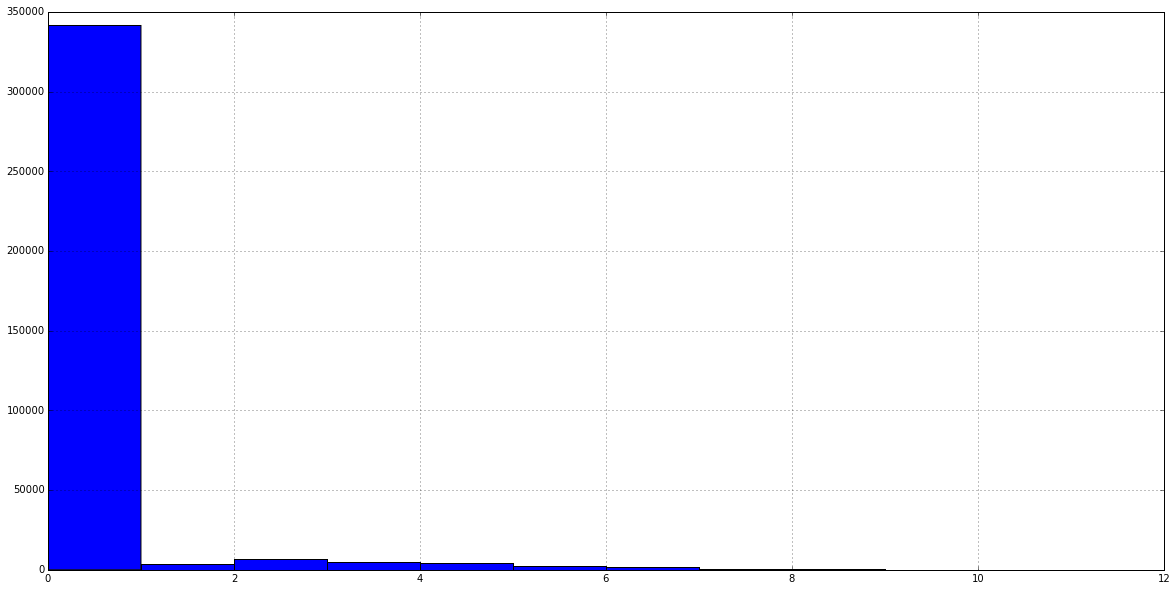

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

data.trendsetter.hist(bins=11, figsize=(20,10))

In [9]:
reg = RandomForestRegressor(n_estimators=100, max_features='sqrt')
reg.fit(X, y)
np.abs(cross_val_score(reg, X, y, scoring='mean_absolute_error', cv=10, n_jobs=-1).mean())

0.12568003274678438

# SVM

In [18]:
import pandas as pd
import numpy as np
from patsy import dmatrices, dmatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [23]:
# now try predicting the category with KNN
parameters = {'n_neighbors': range(1, 5), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters, cv=3)
knn_clf.fit(X, y)
print knn_clf.best_params_
cross_val_score(knn_clf, X_train, y, cv=3)

{'n_neighbors': 4, 'weights': 'uniform', 'p': 1}


NameError: name 'X_train' is not defined